<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="figures/PHydro-cover-small.png">
*This is the Jupyter notebook version of the [Python in Hydrology](http://www.greenteapress.com/pythonhydro/pythonhydro.html) by Sat Kumar Tomer.*
*Source code is available at [code.google.com](https://code.google.com/archive/p/python-in-hydrology/source).*

*The book is available under the [GNU Free Documentation License](http://www.gnu.org/copyleft/fdl.html). If you have comments, corrections or suggestions, please send email to satkumartomer@gmail.com.*

<!--NAVIGATION-->
< [The Chi Square test](05.05-The-Chi-Square-test.ipynb) | [Contents](Index.ipynb) | [Linear Regression](05.07-Linear-Regression.ipynb) >

## 5.6 统计相关测度

通常我们感兴趣的是知道两个水文变量是否依赖。在本节中，将描述它以检查他们的统计相关性。如果两个变量是统计相关的，这并不意味着它们在物理上也是相关的。首先，我们将生成两个具有不同关系的变量。很少有完美的关系，很少有完美的关系，很少有一些带噪音。在下面的例子中，我们创建了六个变量:

- 全的线性关系($y = a + bx$),
- 带噪音的线性关系($y = a + bx + \epsilon$),
- 单调二次关系($y=x^2$),
- 带噪音的二次关系($y=x^2+\epsilon$),
- 非单调二次关系($y=(x-5)^2$),以及
- 噪音添加到前一个($y=(x-5)^2+\epsilon$)

图5.12显示了这些变量。在这六个变量中，三个拥有完美的关系，三个有一些噪音。我们期望我们的统计相关性度量能揭示这一点。

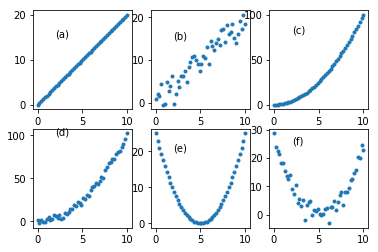

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,10)
y1 = 2*x
y2 = y1 + 2*np.random.randn(50)
y3 = x**2
y4 = y3 + 2*np.random.randn(50)
y5 = (x-5)**2
y6 = y5 + 2*np.random.randn(50)

plt.subplot(2,3,1)
plt.plot(x,y1,'.')
plt.text(2,15,'(a)')

plt.subplot(2,3,2)
plt.plot(x,y2,'.')
plt.text(2,15,'(b)')

plt.subplot(2,3,3)
plt.plot(x, y3, '.')
plt.text(2,80,'(c)')

plt.subplot(2,3,4)
plt.plot(x, y4, '.')
plt.text(2,100,'(d)')

plt.subplot(2,3,5)
plt.plot(x, y5, '.')
plt.text(2,20,'(e)')

plt.subplot(2,3,6)
plt.plot(x, y6, '.')
plt.text(2,25,'(f)')
plt.show()

<center>图5.12:两种变量间不同类型的相关性</center>

不幸的是，在非线性情况下，没有办法揭示关系的强度。其原因是我们可以有任何形式的非线性关系，这是不可能将测量量化的。话虽如此，有些测量在某些情况下运行良好。我们将探索其中的几个。首先从皮尔森相关系数开始，它提供了线性关系的强度。`st.pearsonr`函数可以用来计算皮尔森相关系数。这个函数也给出了p值，它可以用于量化关系的显著性。我们是用`%`运算符格式化输出。`.2f`告诉打印输出至小数点后第二位。

In [4]:
import scipy.stats as st
r1, p1 = st.pearsonr(x,y1)
r2, p2 = st.pearsonr(x,y2)
r3, p3 = st.pearsonr(x,y3)
r4, p4 = st.pearsonr(x,y4)
r5, p5 = st.pearsonr(x,y5)
r6, p6 = st.pearsonr(x,y6)

# print r's
print(('%.2f %.2f %.2f %.2f %.2f %.2f')%(r1,r2,r3,r4,r5,r6))

1.00 0.95 0.97 0.96 0.00 -0.11


第一种情况下，我们得到1.0，第二种情况的值略小于1.0，因为我们扰乱了关系。在第三种情况中，我们得到了的一个值为0.97，而实际上这种关系是完美的，但不是线性的。第五种情况下，这个值为0，即使关系是完美的。所以我们可以得出结论，皮尔逊相关系数只是测量线性关系。现在我们将使用`st.spearman`来计算所有六种情况下的Spearman相关系数。

In [5]:
rho1, p1 = st.spearmanr(x,y1)
rho2, p2 = st.spearmanr(x,y2)
rho3, p3 = st.spearmanr(x,y3)
rho4, p4 = st.spearmanr(x,y4)
rho5, p5 = st.spearmanr(x,y5)
rho6, p6 = st.spearmanr(x,y6)

# print rho's
print(('%.2f %.2f %.2f %.2f %.2f %.2f')%(rho1,rho2,rho3,rho4,rho5,rho6))

1.00 0.95 1.00 0.99 0.01 -0.09


Spearman相关系数提供了Spearman的类似输出，只是它能够更好地识别第三和第四种情况的关系。在第三和第四种情况中，这种关系是单调非线性的。当数据具有单调行为的时，Spearman相关系数是有用的度量。但是，在关系明确的情况下，但不是单调的时候，这种方法也不能正常工作。Kendall’s tau相关系数是度量秩相关的统计量。Kendall’s tau可以用`st.kendalltau`函数来计算。

In [7]:
tau1, p1 = st.kendalltau(x,y1)
tau2, p2 = st.kendalltau(x,y2)
tau3, p3 = st.kendalltau(x,y3)
tau4, p4 = st.kendalltau(x,y4)
tau5, p5 = st.kendalltau(x,y5)
tau6, p6 = st.kendalltau(x,y6)

# print tau's
print(('%.2f %.2f %.2f %.2f %.2f %.2f')%(tau1,tau2,tau3,tau4,tau5,tau6))

1.00 0.81 1.00 0.94 0.01 -0.05


这提供了与斯皮尔曼相关系数类似的度量，并且不能揭示我们在第五和第六种情况下存在的非单调关系。